In [1]:
import pandas as pd

1. Spam Data

a. Load the spam data set.

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1', usecols=[0,1]) # getting rid of the unwanted (unamed) columns
df.columns = ['label', 'text']
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Going to clean up the data to visualize better

In [3]:
# Looking at the data breakup
labels = pd.concat([df.label.value_counts(), # get total counts of ham vs spam
                    df.label.value_counts(normalize=True)], axis=1) # getting the prop of ham vs. spam
labels.columns = ['n', 'percent']
labels

,n,percent
ham,4825,0.865937
spam,747,0.134063


In [4]:
import unicodedata
import re
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
import pandas as pd
import prepare as p

In [18]:
p.basic_clean?

In [19]:
# adding text to basic clean cleaned with my basic clean function
df['text_cleaned'] = df.text.apply(p.basic_clean)

In [20]:
df.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...,nah i dont think he go to usf he life around h...,nah dont think go usf life around though


In [9]:
# Tokenizing the data
df['text_tokenized'] = df.text_cleaned.apply(p.tokenize)
df.head()

,label,text,text_cleaned,text_tokenized
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...


In [10]:
# Lemmatized the data
df['text_lemmatized'] = df.text_tokenized.apply(p.lemmatize)
df.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...,nah i dont think he go to usf he life around h...


In [12]:
# Filtered data
df['text_filtered'] = df.text_lemmatized.apply(p.remove_stopwords)
df.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...,nah i dont think he go to usf he life around h...,nah dont think go usf life around though


In [21]:
# Making each string indivdually and getting rid of whitespace
words = [re.sub(r'([^a-z0-9\s]|\s.\s)', '', doc).split() for doc in df.text_filtered]
words

[['go',
  'jurong',
  'point',
  'crazy',
  'available',
  'bugisgreat',
  'world',
  'labuffet',
  'cine',
  'got',
  'amore',
  'wat'],
 ['ok', 'lar', 'joking', 'wifoni'],
 ['free',
  'entrywkly',
  'comp',
  'win',
  'fa',
  'cup',
  'final',
  'tkts',
  '21st',
  'may',
  '2005',
  'text',
  'fa',
  '87121',
  'receive',
  'entry',
  'questionstd',
  'txt',
  'ratetcs',
  'apply',
  '08452810075over18s'],
 ['u', 'dun', 'say', 'early', 'horc', 'already', 'say'],
 ['nah', 'dont', 'think', 'go', 'usf', 'life', 'around', 'though'],
 ['freemsg',
  'hey',
  'darlingweek',
  'word',
  'back',
  'id',
  'like',
  'fun',
  'still',
  'tb',
  'ok',
  'xxx',
  'std',
  'chgs',
  'send',
  'i12150',
  'rcv'],
 ['even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent'],
 ['per',
  'request',
  'melle',
  'melle',
  'oru',
  'minnaminunginte',
  'nurungu',
  'vettam',
  'ha',
  'set',
  'callertune',
  'caller',
  'presscopy',
  'friend',
  'callertune'],
 ['winner',
  'valued',
  'n

In [ ]:
# column name will be words and the column will contain a list of the words in each doc    
df= pd.concat([df, pd.DataFrame({'words': words})], axis=1)

In [23]:
df.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered,words
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugisgre..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wifoni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entrywkly, comp, win, fa, cup, final, t..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say,"[u, dun, say, early, horc, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...,nah i dont think he go to usf he life around h...,nah dont think go usf life around though,"[nah, dont, think, go, usf, life, around, though]"


In [25]:
# Adding ham words
ham_words = df[df.label == 'ham'].text_filtered
ham_words

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
3                     u dun say early hor u c already say
4                nah dont think go usf life around though
6           even brother like speak treat like aid patent
                              ...                        
5565                                              huh lei
5568                        i12 b going esplanade fr home
5569                        pity wa mood soany suggestion
5570    guy bitching acted like id interested buying s...
5571                                       rofl true name
Name: text_filtered, Length: 4825, dtype: object

In [32]:
# How you would add ham words to make one string
ham_words =' '.join(df[df.label == 'ham'].text_filtered)

In [33]:
spam_words =' '.join(df[df.label == 'spam'].text_filtered)

In [34]:
all_words =' '.join(df.text_filtered)

In [37]:
# getting rid of the single characters. example, don't, ascii filter gets rid of the ' but puts adds space to 
# where it was. Now get rid of the space between don and t.
ham_words = re.sub(r'\s.\s', '', ham_words)
spam_words = re.sub(r'\s.\s', '', spam_words)
all_words = re.sub(r'\s.\s', '', all_words)

### Once we have a list of words, we can transform it into a pandas Series, which we can then use to show us how often each of the words occurs.

In [36]:
ham_freq = pd.Series(ham_words.split()).value_counts()
spam_freq = pd.Series(spam_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

all_freq.head()

call    552
im      450
get     351
ur      343
dont    257
dtype: int64

In [38]:
word_counts = (pd.concat([all_freq, ham_freq, spam_freq], axis=1, sort=True)
               .set_axis(['all', 'ham', 'spam'], axis=1, inplace=False)
               .fillna(0)
               .apply(lambda s: s.astype(int))
              )

word_counts.head()

,all,ham,spam
008704050406,2,0,2
0089my,1,0,1
0121,1,0,1
01223585236,1,0,1
01223585334,2,0,2


In [41]:
# how many words index[0] has
len(df.words[0])

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugisgreat',
 'world',
 'labuffet',
 'cine',
 'got',
 'amore',
 'wat']

In [42]:
# Creating a column to see how long the text is
df['doc_length'] = [len(wordlist) for wordlist in df.words]
df.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered,words,doc_length
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugisgre...",12
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wifoni]",4
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entrywkly, comp, win, fa, cup, final, t...",21
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say,"[u, dun, say, early, horc, already, say]",7
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...,nah i dont think he go to usf he life around h...,nah dont think go usf life around though,"[nah, dont, think, go, usf, life, around, though]",8


In [43]:
# Have 5 nulls that i can address
df[df.doc_length == 0]

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered,words,doc_length
959,ham,Where @,where,where,where,,[],0
2805,ham,Can a not?,can a not,can a not,can a not,,[],0
3374,ham,:),,,,,[],0
4573,ham,:( but your not here....,but your not here,but your not here,but your not here,,[],0
4822,ham,:-) :-),,,,,[],0


In [44]:
df = df[df.doc_length != 0]

# Visualizing

In [45]:
# the %matplotlib inline will make your plot outputs appear and be stored within the notebook.
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Proportion of Spam vs Ham for the 20 most common words in our sample')

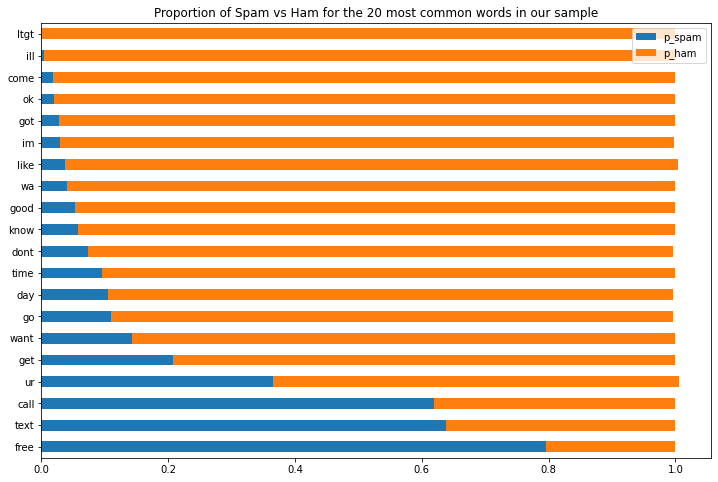

In [49]:
# visualize the percentage of the term in ham vs. spam

(word_counts.assign(p_spam = word_counts.spam/word_counts['all'],
                  p_ham = word_counts.ham/word_counts['all'])
.sort_values(by='all')[['p_spam', 'p_ham']]
.tail(20)
 .sort_values('p_ham')
 .plot.barh(stacked=True, figsize=(12,8))
)

plt.title('Proportion of Spam vs Ham for the 20 most common words in our sample')

# b. Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?

In [50]:
from wordcloud import WordCloud

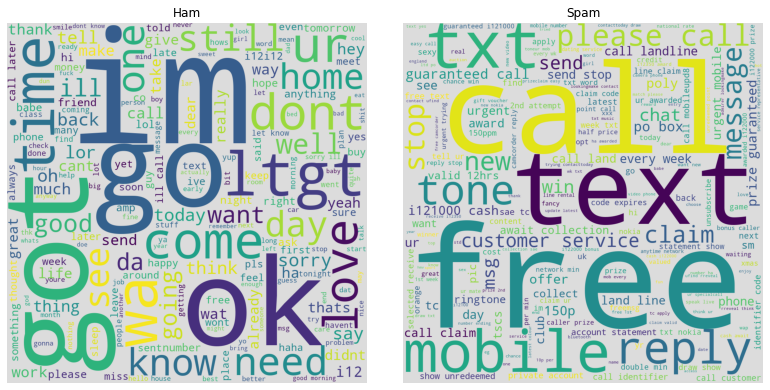

In [57]:
# Word cloud of ham and spam text
ham_cloud = WordCloud(background_color='gainsboro', 
                      height=1000, width=1000).generate(ham_words)

spam_cloud = WordCloud(background_color='gainsboro', 
                      height=1000, width=1000).generate(spam_words)

plt.figure(figsize=(10,10))
axs = [plt.axes([.25, 1, .5, .5]), plt.axes([.8, 1, .5, .5])]

# imshow => display data as an image
axs[0].imshow(ham_cloud)
axs[1].imshow(spam_cloud)

axs[0].set_title('Ham')
axs[1].set_title('Spam')

for ax in axs: ax.axis('off')

### Here we can see that im, got, ok, go are a few of the common words in ham. For spam, you can see free, call, text, mobile are a few common words

# Now looking at how the bigrams compare
We can apply the same transformation to our ham data set in order to find out which bigrams are the most frequently occuring.

In [58]:
df['bigrams'] = [list(nltk.ngrams(wordlist, 2)) for wordlist in df.words]
df.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered,words,doc_length,bigrams
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugisgre...",12,"[(go, jurong), (jurong, point), (point, crazy)..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wifoni]",4,"[(ok, lar), (lar, joking), (joking, wifoni)]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entrywkly, comp, win, fa, cup, final, t...",21,"[(free, entrywkly), (entrywkly, comp), (comp, ..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say,"[u, dun, say, early, horc, already, say]",7,"[(u, dun), (dun, say), (say, early), (early, h..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...,nah i dont think he go to usf he life around h...,nah dont think go usf life around though,"[nah, dont, think, go, usf, life, around, though]",8,"[(nah, dont), (dont, think), (think, go), (go,..."


In [87]:
# looking at how the top 20 ham and spam bigrams list looks.
ham_bigrams = pd.Series(list(nltk.ngrams(ham_words.split(), 2))).value_counts().head(20)
spam_bigrams = pd.Series(list(nltk.ngrams(spam_words.split(), 2))).value_counts().head(20)
all_bigrams = pd.Series(list(nltk.ngrams(all_words.split(), 2))).value_counts().head(20)

In [88]:
# Count bigrams

word_counts = (pd.concat([all_bigrams, ham_bigrams, spam_bigrams], axis=1, sort=True)
               .set_axis(['all', 'ham', 'spam'], axis=1, inplace=False)
               .fillna(0)
               .apply(lambda s: s.astype(int))
              )

word_counts.head()

all  ham  spam
account statement     0    0    16
await   collection    0    0    18
call    customer      0    0    15
        later        47   47     0
        mobileupd8    0    0    15

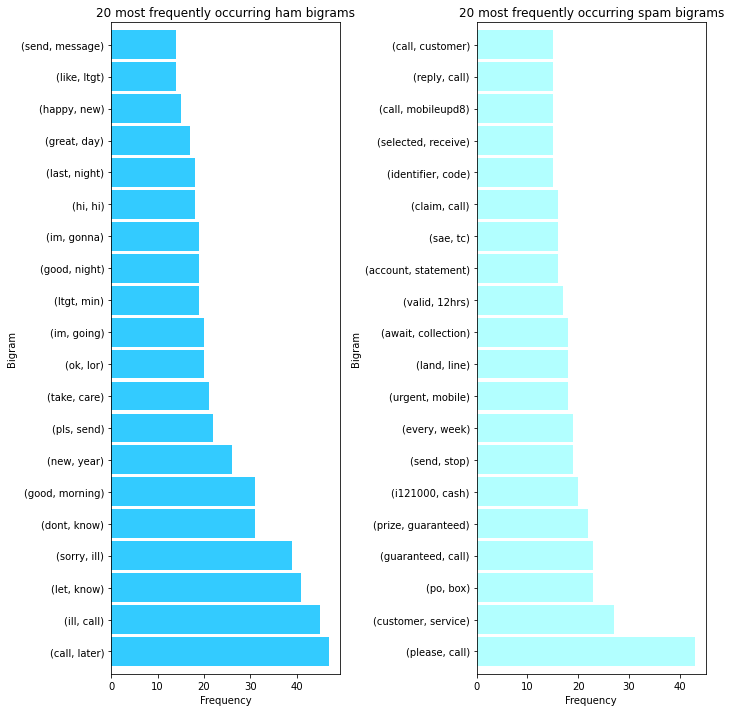

In [89]:

plt.subplot(121)
ham_bigrams.plot.barh(color='deepskyblue', width=.9, figsize=(10, 10), alpha=.8)
plt.title('20 most frequently occurring ham bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')

plt.subplot(122)
spam_bigrams.plot.barh(color='aqua', width=.9, figsize=(10, 10), alpha=.3)
plt.title('20 most frequently occurring spam bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()

In [74]:
# Since we have two words, this list comprehension takes into account of the the space in between the words
# Examp.e. for every word in spam bigrams, add the single strings to a dictionary
data = {k[0] + ' ' + k[1]: v for k, v in spam_bigrams.to_dict().items()}
data

{'please call': 43,
 'customer service': 27,
 'po box': 23,
 'guaranteed call': 23,
 'prize guaranteed': 22,
 'i121000 cash': 20,
 'send stop': 19,
 'every week': 19,
 'urgent mobile': 18,
 'land line': 18,
 'await collection': 18,
 'valid 12hrs': 17,
 'account statement': 16,
 'sae tc': 16,
 'claim call': 16,
 'identifier code': 15,
 'selected receive': 15,
 'call mobileupd8': 15,
 'reply call': 15,
 'call customer': 15}

(-0.5, 999.5, 599.5, -0.5)

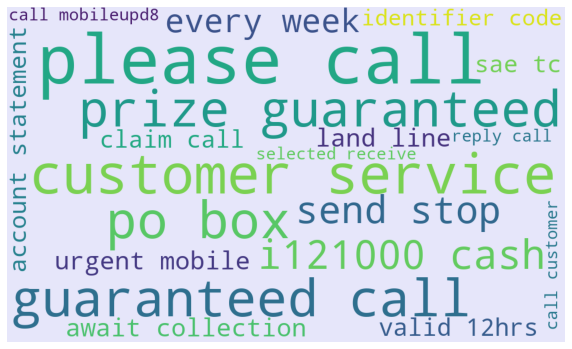

In [76]:
img = WordCloud(background_color='lavender', 
                width=1000, height=600).generate_from_frequencies(data)
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')

## Here we can see how 2 words make a difference. Please call, customer service, prize guaranteed are a few of the common pairs of words found in the spam bigrams.

In [77]:
# Since we have two words, this list comprehension takes into account of the the space in between the words
# Examp.e. for every word in spam bigrams, add the single strings to a dictionary
data_ = {k[0] + ' ' + k[1]: v for k, v in ham_bigrams.to_dict().items()}
data_

{'call later': 47,
 'ill call': 45,
 'let know': 41,
 'sorry ill': 39,
 'dont know': 31,
 'good morning': 31,
 'new year': 26,
 'pls send': 22,
 'take care': 21,
 'ok lor': 20,
 'im going': 20,
 'ltgt min': 19,
 'good night': 19,
 'im gonna': 19,
 'hi hi': 18,
 'last night': 18,
 'great day': 17,
 'happy new': 15,
 'like ltgt': 14,
 'send message': 14}

(-0.5, 999.5, 599.5, -0.5)

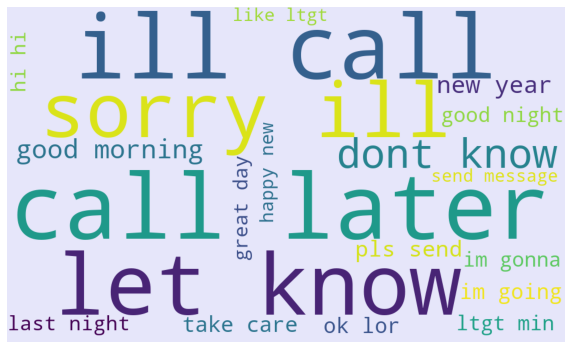

In [109]:
img = WordCloud(background_color='lavender',
                width=1000, height=600).generate_from_frequencies(data_)
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')

#### Ham bigram shows let know, call later and ill call as common. Spam showed please call, customer service, prize guaranteed . You can see how the choice of wording makes a difference. Ham seems to be fine without getting a response were the spam is more assertive and trys to lure you in

# Is there any overlap in the bigrams for the spam data and the ham data?

In [90]:
word_counts.sort_values(by='all', ascending=False).head(15)

,,all,ham,spam
please,call,52,0,43
call,later,47,47,0
ill,call,45,45,0
let,know,41,41,0
sorry,ill,39,39,0
dont,know,34,31,0
good,morning,31,31,0
customer,service,29,0,27
new,year,28,26,0
po,box,24,0,23


### There does not seem to be any overlap when looking at bigrams

# d. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [91]:
# Create trigrams

ham_trigrams = pd.Series(list(nltk.ngrams(ham_words.split(), 3))).value_counts().head(20)
spam_trigrams = pd.Series(list(nltk.ngrams(spam_words.split(), 3))).value_counts().head(20)
all_trigrams = pd.Series(list(nltk.ngrams(all_words.split(), 3))).value_counts().head(20)

In [92]:
# Count trigrams. Not very many. You can see how your words get reduced significantly with a trigram

word_counts = (pd.concat([all_trigrams, ham_trigrams, spam_trigrams], axis=1, sort=True)
               .set_axis(['all', 'ham', 'spam'], axis=1, inplace=False)
               .fillna(0)
               .apply(lambda s: s.astype(int))
              )

word_counts.head()

,,,all,ham,spam
2003,account,statement,13,0,13
800,unredeemed,point,0,0,9
anytime,network,min,0,0,11
askdlunch,lunch,invited,0,5,0
bonus,caller,prize,11,0,11


In [ ]:
font_path = 'path/to/font'
wc = WordCloud(stopwords=STOPWORDS, font_path=font_path, 
               background_color="white", max_words=2000,
               max_font_size=256, random_state=42,
               width=500, height=500)
wc.generate(article.text)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

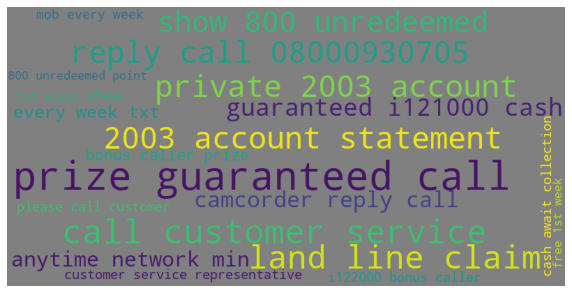

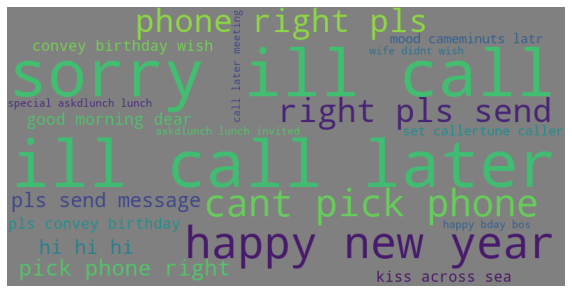

In [105]:

# spam bigram data
data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in spam_trigrams.to_dict().items()}
img = WordCloud(background_color='grey',
                width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis('off')

# ham bigram data
data =  {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in ham_trigrams.to_dict().items()}
img = WordCloud(background_color='grey', 
                width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(10,6))
plt.imshow(img)
plt.axis('off')
plt.show()

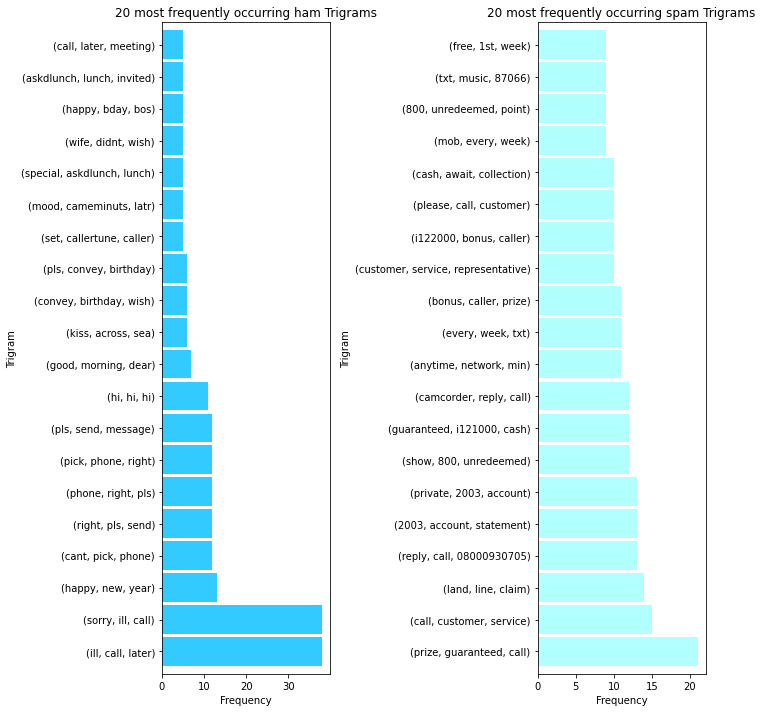

In [97]:
plt.subplot(121)
ham_trigrams.plot.barh(color='deepskyblue', width=.9, figsize=(10, 10), alpha=.8)
plt.title('20 most frequently occurring ham Trigrams')
plt.ylabel('Trigram')
plt.xlabel('Frequency')

plt.subplot(122)
spam_trigrams.plot.barh(color='aqua', width=.9, figsize=(10, 10), alpha=.3)
plt.title('20 most frequently occurring spam Trigrams')
plt.ylabel('Trigram')
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()


### Same common words show up like the bigrams. Frequency is reduced as you add more words to search for.

# Trying to make a shape out of text

In [161]:
from PIL import Image
import numpy as np
from os import path
import os
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

,title,content
0,Codeup’s Data Science Career Accelerator is Here!,The rumors are true! The time has arrived. Cod...


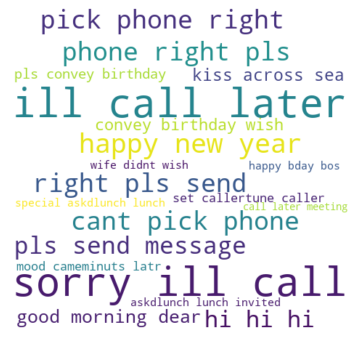

In [136]:
# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

texas = np.array(Image.open(path.join(d,'map_texas.png')))
stopwords = set(STOPWORDS)

data =  {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in ham_trigrams.to_dict().items()}
img = WordCloud(background_color='white',
                mask=texas, width=mask.shape[1],
                height=mask.shape[0])
img.generate_from_frequencies(data)
# create coloring from image
image_colors = ImageColorGenerator(texas)
plt.figure(figsize=(10,6))
plt.imshow(img, interpolation="bilinear")
plt.axis('off')
plt.show()

# 2. Explore the blog articles using the techniques discussed in the exploration lesson.

In [179]:
import pandas as pd
import numpy as np
from requests import get
import os
from bs4 import BeautifulSoup

In [180]:
codeup = pd.read_json('big_blogs.json')
codeup.head()

,title,content
0,Codeup’s Data Science Career Accelerator is Here!,The rumors are true! The time has arrived. Cod...


In [181]:
codeup = p.prep_article_data(codeup,'content')
codeup.head()

,title,content,stemmed,lemmatized,clean
0,Codeup’s Data Science Career Accelerator is Here!,The rumors are true! The time has arrived. Cod...,the rumor are true the time ha arriv codeup ha...,the rumor are true the time ha arrived codeup ...,rumor true time arrived codeup officially open...


In [182]:
# add a column with list of words
words = [re.sub(r'([^a-z0-9\s]|\s.\s)', '', doc).split() for doc in codeup.lemmatized]
words
codeup = pd.concat([codeup, pd.DataFrame({'words': words})], axis=1)

In [183]:
codeup.head()

,title,content,stemmed,lemmatized,clean,words
0,Codeup’s Data Science Career Accelerator is Here!,The rumors are true! The time has arrived. Cod...,the rumor are true the time ha arriv codeup ha...,the rumor are true the time ha arrived codeup ...,rumor true time arrived codeup officially open...,"[the, rumor, are, true, the, time, ha, arrived..."


AttributeError: 'list' object has no attribute 'value_counts'

# 3. Explore the news articles using the techniques discussed in the exploration lesson. 

In [193]:
df = pd.read_json('articles.json')
df = p.prep_article_data(df, 'content')

In [194]:
df.head()

,title,content,stemmed,lemmatized,clean
0,Moderna's early data shows its COVID-19 vaccin...,American biotechnology company Moderna on Mond...,american biotechnolog compani moderna on monda...,american biotechnology company moderna on mond...,american biotechnology company moderna monday ...
1,"Lakshmi Vilas Bank withdrawals capped at ₹25,0...",The Centre has imposed a 30-day moratorium on ...,the centr ha impos a 30day moratorium on laksh...,the centre ha imposed a 30day moratorium on la...,centre imposed 30day moratorium lakshmi vila b...
2,Pfizer shares drop 4.5% as Moderna says its va...,Pfizer’s shares fell as much as 4.5% on Monday...,pfizer share fell as much as 45 on monday afte...,pfizers share fell a much a 45 on monday after...,pfizers share fell much 45 monday rival modern...
3,How does Moderna's COVID-19 vaccine candidate ...,Moderna's initial results of late-stage trial ...,moderna initi result of latestag trial show it...,modernas initial result of latestage trial sho...,modernas initial result latestage trial show c...
4,"Musk gets $15bn richer in 2 hours, becomes wor...",Billionaire Elon Musk added $15 billion to his...,billionair elon musk ad 15 billion to hi wealt...,billionaire elon musk added 15 billion to his ...,billionaire elon musk added 15 billion wealth ...


In [195]:
# add a column with list of words
words = [re.sub(r'([^a-z0-9\s]|\s.\s)', '', doc).split() for doc in df.clean]
words
df = pd.concat([df, pd.DataFrame({'words': words})], axis=1)
df.head()

,title,content,stemmed,lemmatized,clean,words
0,Moderna's early data shows its COVID-19 vaccin...,American biotechnology company Moderna on Mond...,american biotechnolog compani moderna on monda...,american biotechnology company moderna on mond...,american biotechnology company moderna monday ...,"[american, biotechnology, company, moderna, mo..."
1,"Lakshmi Vilas Bank withdrawals capped at ₹25,0...",The Centre has imposed a 30-day moratorium on ...,the centr ha impos a 30day moratorium on laksh...,the centre ha imposed a 30day moratorium on la...,centre imposed 30day moratorium lakshmi vila b...,"[centre, imposed, 30day, moratorium, lakshmi, ..."
2,Pfizer shares drop 4.5% as Moderna says its va...,Pfizer’s shares fell as much as 4.5% on Monday...,pfizer share fell as much as 45 on monday afte...,pfizers share fell a much a 45 on monday after...,pfizers share fell much 45 monday rival modern...,"[pfizers, share, fell, much, 45, monday, rival..."
3,How does Moderna's COVID-19 vaccine candidate ...,Moderna's initial results of late-stage trial ...,moderna initi result of latestag trial show it...,modernas initial result of latestage trial sho...,modernas initial result latestage trial show c...,"[modernas, initial, result, latestage, trial, ..."
4,"Musk gets $15bn richer in 2 hours, becomes wor...",Billionaire Elon Musk added $15 billion to his...,billionair elon musk ad 15 billion to hi wealt...,billionaire elon musk added 15 billion to his ...,billionaire elon musk added 15 billion wealth ...,"[billionaire, elon, musk, added, 15, billion, ..."
